# Chapter 7 - Resampling and Interpolation

You may have observations at the wrong frequency. Maybe they are too granular or not granular enough. The Pandas library in Python provides the capability to change the frequency of your time series data.

After completing this tutorial, you will know:
- About time series resampling, the two types of resampling, and the 2 main reasons why you need to use them.
- How to use Pandas to upsample time series data to a higher frequency and interpolate the new observations.
- How to use Pandas to downsample time series data to a lower frequency and summarize the higher frequency observations.

## 7.1 Resampling

Resampling involves changing the frequency of your time series observations. Two types of resampling are:
- **Upsampling**: Where you increase the frequency of the samples, `such as from minutes to seconds`.
- **Downsampling**: Where you decrease the frequency of the samples, `such as from days to months`.

There are perhaps two main reasons why you may be interested in resampling your time series data 
- **Problem Framing**: Resampling may be required if your data is not available at the same frequency that you want to make predictions.
- **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

## 7.2 Shampoo Sales Dataset

This dataset describes the monthly number of sales of shampoo over a 3 year period.

## 7.3 Upsampling Data

Imagine we wanted daily sales information. We would have to `upsample the frequency` from monthly to daily and use an interpolation scheme to fill in the new daily frequency.

In [1]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\chapter_07\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

36
Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
Name: Sales, dtype: float64


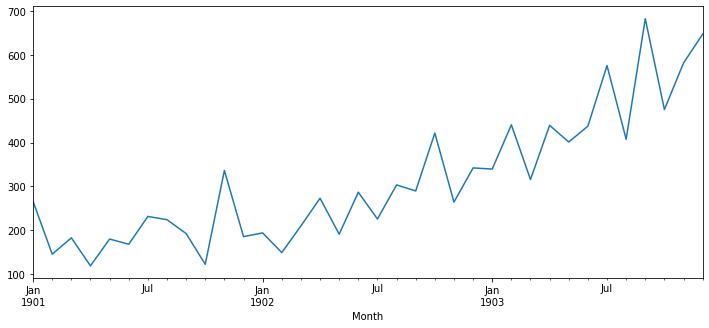

In [2]:
print(len(series))
print(series.head(10))

series.plot(figsize=(12,5))
pyplot.show()

In [3]:
upsampled = series.resample('D').mean()

1065
Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
Freq: D, Name: Sales, dtype: float64


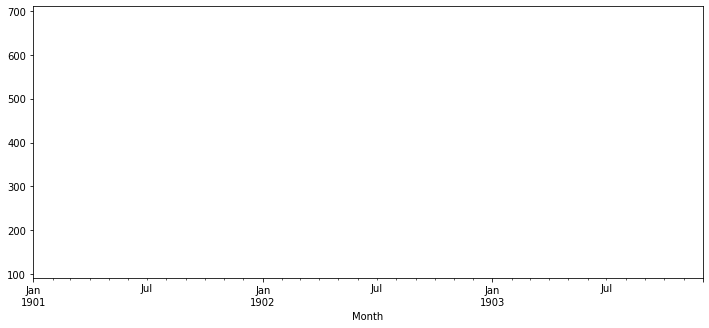

In [4]:
print(len(upsampled))
print(upsampled.head(10))
upsampled.plot(figsize=(12,5))
pyplot.show()

We can see that the resample() function has created the rows by putting NaN values in the new values. We can see we still have the sales volume on the first of January and February from the original data. Next, we can interpolate the missing values at this new frequency.

### 7.3.1 Linear Interpolation.

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
1901-02-02    147.228571
1901-02-03    148.557143
1901-02-04    149.885714
Freq: D, Name: Sales, dtype: float64


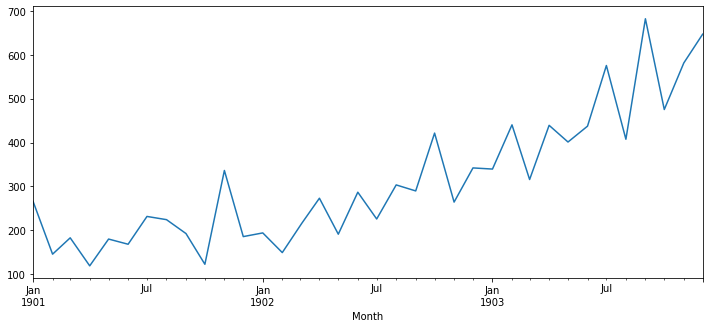

In [5]:
# upsample to daily intervals with linear interpolation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

%matplotlib inline

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\chapter_07\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

upsampled = series.resample('D').mean()

interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(35))

interpolated.plot(figsize=(12,5))
pyplot.show()

### 7.3.2 Polynomial or Spline

Another common interpolation method is to use a polynomial or a spline to connect the values. This creates more curves and can look more natural on many datasets.

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
1901-02-02    146.030765
1901-02-03    146.064698
1901-02-04    146.327765
Freq: D, Name: Sales, dtype: float64


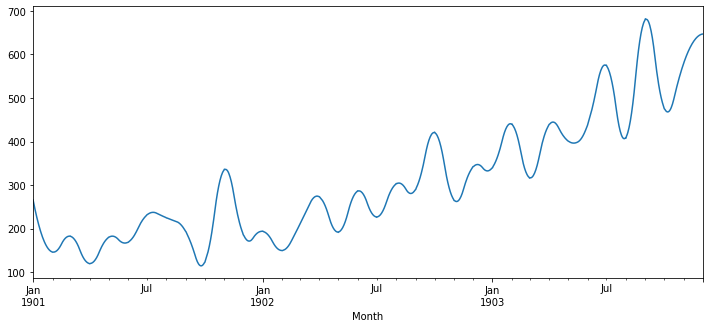

In [6]:
# upsample to daily intervals with spline interpolation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

%matplotlib inline

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\chapter_07\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

upsampled = series.resample('D').mean()

interpolated = upsampled.interpolate(method='spline', order=2)

print(interpolated.head(35))

interpolated.plot(figsize=(12,5))
pyplot.show()

## 7.4 Downsampling Data
The sales data is monthly, but perhaps we would prefer the data to be quarterly. The year can be divided into 4 business quarters, 3 months a piece.

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


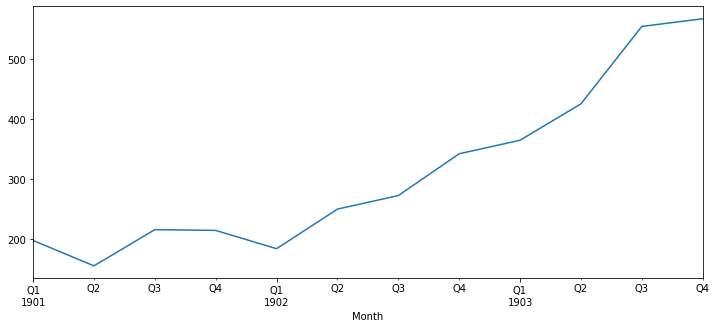

In [7]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

%matplotlib inline

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\chapter_07\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

resample = series.resample('Q')

quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())

quarterly_mean_sales.plot(figsize=(12,5))
pyplot.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


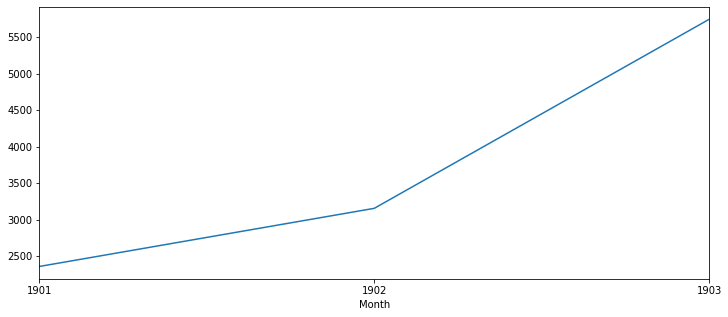

In [8]:
# downsample to yearly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

%matplotlib inline

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

csvfile = '.\\code\chapter_07\shampoo-sales.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

resample = series.resample('A')

yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())

yearly_mean_sales.plot(figsize=(12,5))
pyplot.show()